In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import skimage.io
import skimage.morphology
import skimage.segmentation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

import utils.evaluation

In [2]:
results = pd.DataFrame(columns=["Image", "nb_cell", "ratio1", "ratio2"])

filelist = sorted(os.listdir('DATA/FISH/raw_annotations/'))
filelist = [x for x in filelist if x.endswith('png')]
all_images = filelist

for image_name in all_images:
    img_filename = os.path.join('DATA/FISH/raw_annotations/', image_name)
    ground_truth = skimage.io.imread(img_filename)
    pred_filename = os.path.join('DATA/FISH/boundary_labels/', image_name)
    prediction = skimage.io.imread(pred_filename)

    results = utils.evaluation.num_analysis(
        ground_truth, 
        prediction, 
        results, 
        image_name
    )

In [4]:
results['ratio1'].mean()

array([13.74041298,  3.00884956,  1.        ])

In [36]:
annot = skimage.io.imread('DATA/FISH/raw_annotations/' + '0000.png')
annot = skimage.morphology.label(annot)

bd = skimage.segmentation.find_boundaries(annot, mode='outer')

# make the boundary wider
for k in range(2, 4, 2):
    bd2 = skimage.morphology.binary_dilation(bd2)

annot2 = annot.copy()
annot2[annot>0] = 1

print(np.sum(annot2), np.sum(bd))

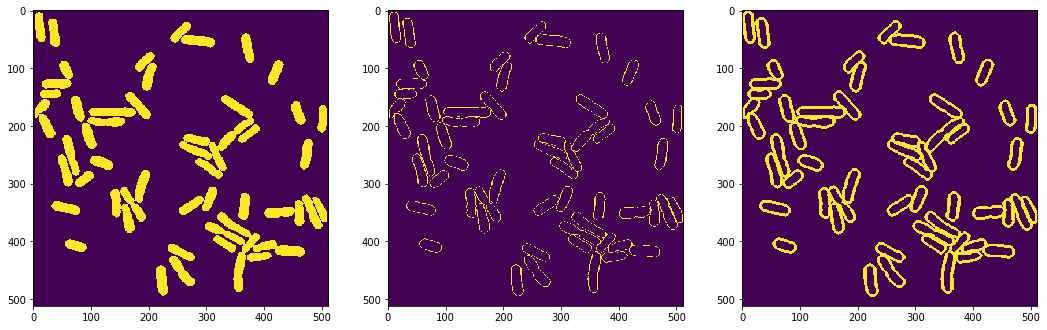

In [39]:
fig, ax = plt.subplots(1,3, figsize=(18,6))
ax[0].imshow(annot2)
ax[1].imshow(bd)
ax[2].imshow(bd2)

In [45]:
comb = annot2 + bd
comb *= 100

np.unique(comb)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(comb, cmap='gray')

original size: (512, 512)


(-0.5, 63.5, 63.5, -0.5)

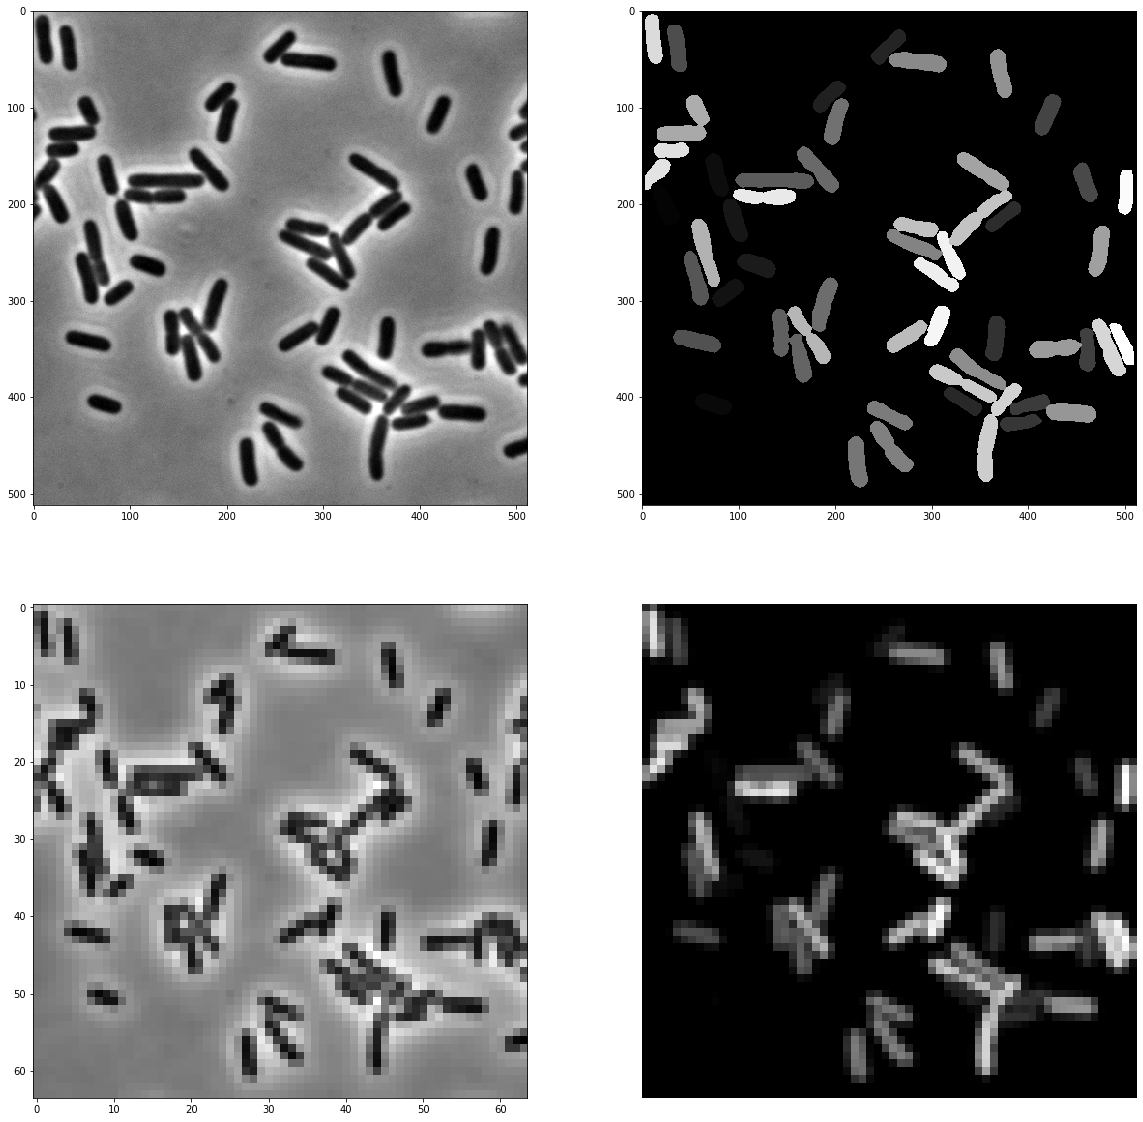

In [4]:
img = skimage.io.imread('DATA/FISH/norm_images/' + '0000.png')
annot = skimage.io.imread('DATA/FISH/raw_annotations/' + '0000.png')

from skimage.transform import resize

print("original size: {}".format(img.shape))
r_shape = 64 
img_2 = resize(img, (r_shape, r_shape))
annot_2 = resize(annot, (r_shape, r_shape))

fig, ax = plt.subplots(2,2, figsize=(20,20))
ax[0][0].imshow(img, cmap='gray')
plt.axis('off')
ax[0][1].imshow(annot, cmap='gray')
plt.axis('off')
ax[1][0].imshow(img_2, cmap='gray')
plt.axis('off')
ax[1][1].imshow(annot_2, cmap='gray')
plt.axis('off')
